In [18]:
#! /usr/bin/python
# coding: utf-8
# Tuesday, December 22, 2015

%pylab inline

from __future__ import print_function
import re
import sys
import os
import matplotlib as mpl
import seaborn as sns
from matplotlib import pyplot as plt
from pandas import DataFrame, Series
import pandas as pd
import numpy as np



Populating the interactive namespace from numpy and matplotlib


In [19]:
labels = ['优化前Job读取速度', '优化后Job读取速度', '优化前Job写数据速度', '优化后Job写数据速度']

df = pd.read_csv('/Users/jinyongyang/Downloads/2.csv', names=['srb', 'sra', 'swb', 'swa'], skiprows=1)

In [21]:
# df.head()

print(type(df))

df.head()

<class 'pandas.core.frame.DataFrame'>


,srb,sra,swb,swa
0,0.007732,0.020589,0.163218,0.419998
1,0.007898,0.003796,696.475896,344.013833
2,0.010156,0.009454,19.737684,18.729841
3,0.001340,0.014523,0.545850,6.032825
4,0.002799,0.008306,246.796687,752.665648


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


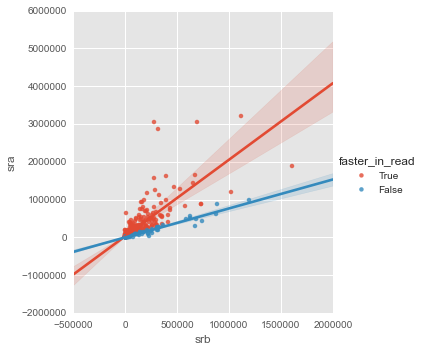

In [26]:
# fig = plt.figure(figsize(20, 12))

# ax = fig.add_subplot(111)

# ax.set_xlim([0, 500000])
# ax.set_ylim([0, 500000])
# ax.set_xlabel(labels[0])
# ax.set_ylabel(labels[1])


# plt.style.use('ggplot')

df['faster_in_read'] = df['sra'] > df['srb']


# sns.regplot(x='srb', y='sra', data=df, color="#4FB391", x_ci=0, fit_reg=True, robust=True, scatter=True, ax=ax)

sns.lmplot(x='srb', y='sra', data=df, hue = 'faster_in_read')

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


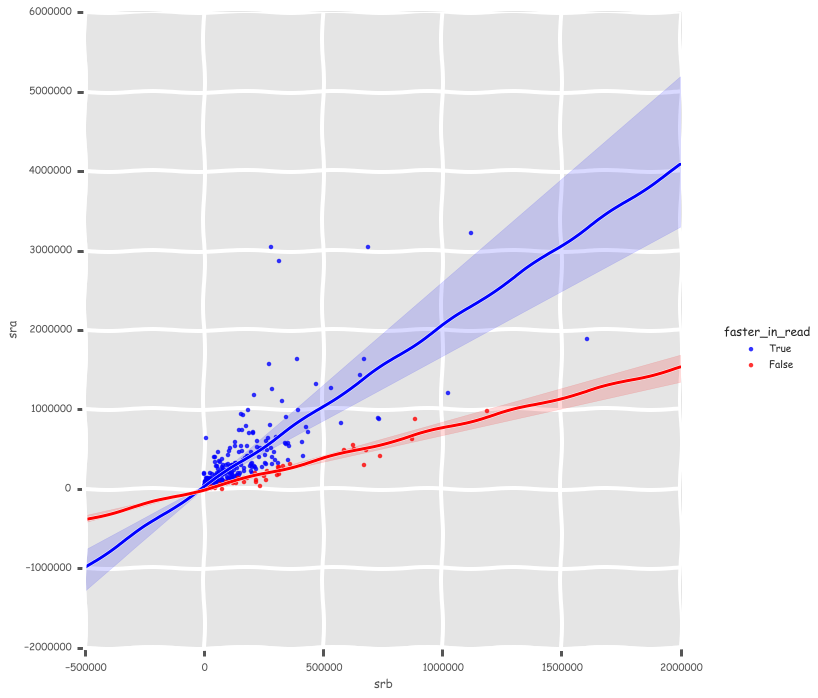

In [17]:
fig = plt.figure(figsize(20, 12))

ax = fig.add_subplot(111)

ax.set_xlim([0, 500000])
ax.set_ylim([0, 500000])
ax.set_xlabel(labels[0])
ax.set_ylabel(labels[1])


with plt.xkcd():
    sns.lmplot("srb", "sra", df, hue="faster_in_read", size=10);
    
    

In [11]:

df['faster_in_read'] = df['sra'] > df['srb']
df.head(1)

,srb,sra,swb,swa,faster_in_read
0,0.007732,0.020589,0.163218,0.419998,True


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


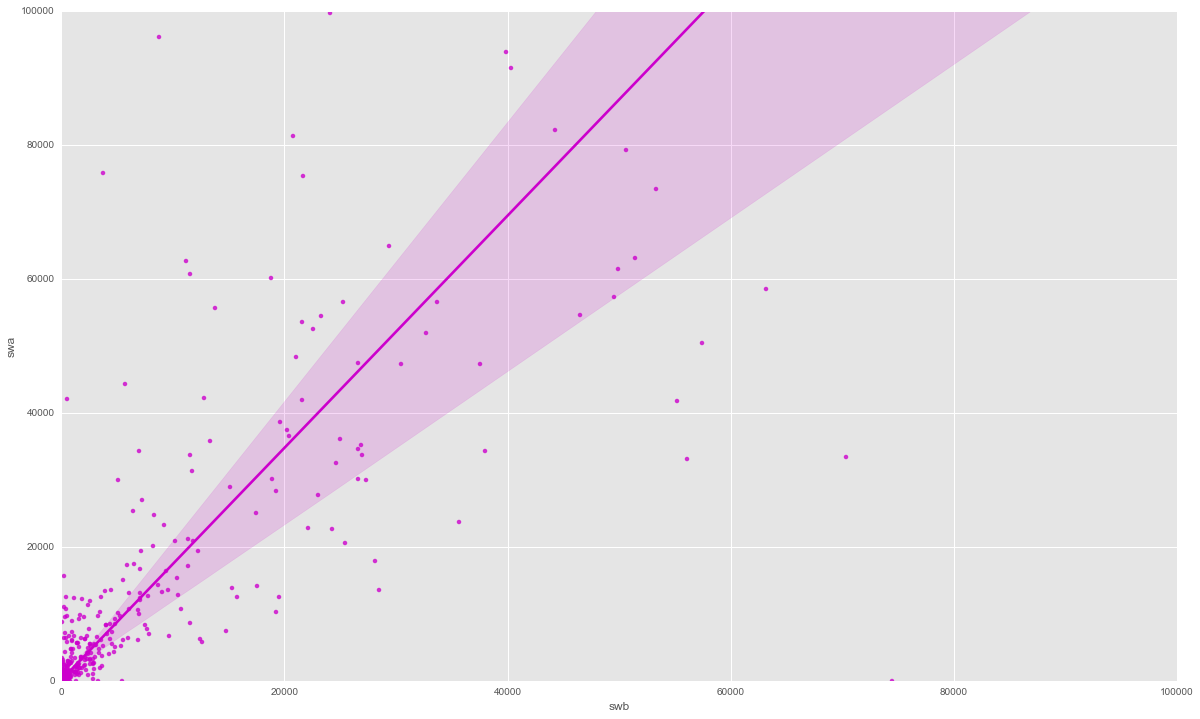

In [28]:

fig = plt.figure(figsize(20, 12))

ax = fig.add_subplot(111)

subdf = df[df.swb > 0]
ax.set_xlim([0, 100000])
ax.set_ylim([0, 100000])
ax.set_xlabel(labels[2])
ax.set_ylabel(labels[3])
plt.style.use('ggplot')

subdf['faster_in_write'] = subdf['swa'] > subdf['swb']


sns.regplot(x='swb', y='swa', data=subdf, color="#CC00CC", x_ci=0, fit_reg=True, robust=True, scatter=True, ax=ax)

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


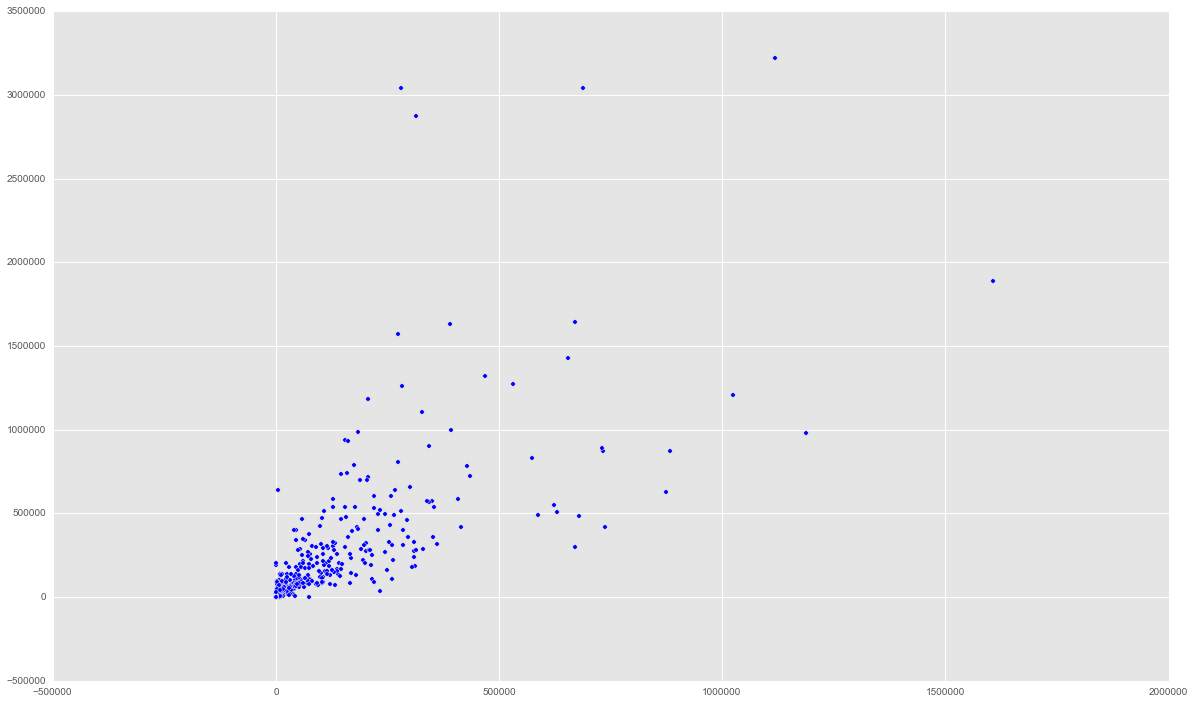

In [34]:
df.head()

subdf = df[['srb', 'sra']]


plt.scatter(df['srb'], df['sra'])